<h2> 경기도 지역화폐 연령별 성별 이용현황 데이터 전처리 및 시각화 </h2>
<h3> [데이터 정보] </h3>
<ul>
  <li> 경기도 각 시군의 연령별 성별 지역화폐 이용 현황 </li>
  <li> 결제 취소 건수, 취소금액, 1회 평균 결제금액 : 선택제공항목으로 시군별로 제공 여부가 상이할 수 있음 </li>
  <li> 갱신주기 : 연간 </li>
  <li> 연령대가 기타인 경우 : 연령 및 성별이 확인되지 않은 지역화폐 결제 내역 </li>
  <li> 금액 데이터의 단위 : 원 </li>

<hr>

<h3> [데이터 검토] </h3>

In [3]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df1 = raw_df1.copy()

In [2]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(1537, 9)


In [3]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준연도      1537 non-null   int64  
 1   시군명       1537 non-null   object 
 2   연령대       1537 non-null   object 
 3   성별        1536 non-null   object 
 4   결제건수      1537 non-null   int64  
 5   결제금액      1537 non-null   float64
 6   결제취소건수    1416 non-null   float64
 7   결제취소금액    1416 non-null   float64
 8   1회평균결제금액  1416 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 108.2+ KB
None


In [4]:
# 데이터 살펴보기
df1.head(10)

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
0,2023,가평군,10,남,8409,1.888451e+08,46.0,4871840.0,22457.0
1,2023,가평군,10,여,6584,1.766054e+08,68.0,1841390.0,26823.0
2,2023,가평군,20,남,70363,1.545018e+09,728.0,37559999.0,21958.0
3,2023,가평군,20,여,55118,1.332507e+09,681.0,27996349.0,24176.0
4,2023,가평군,30,남,110968,2.682235e+09,1382.0,84476317.0,24171.0
5,2023,가평군,30,여,99493,2.563404e+09,1230.0,54207827.0,25765.0
6,2023,가평군,40,남,167399,4.188413e+09,1629.0,100770277.0,25021.0
7,2023,가평군,40,여,189169,4.782433e+09,1909.0,77437079.0,25281.0
8,2023,가평군,50,남,190205,4.879269e+09,1796.0,109244307.0,25653.0
9,2023,가평군,50,여,170268,4.780309e+09,1587.0,83345676.0,28075.0


In [5]:
# 데이터의 결측치 확인
print(('데이터1의 결측치 : '))
df1.isnull().sum()

데이터1의 결측치 : 


기준연도          0
시군명           0
연령대           0
성별            1
결제건수          0
결제금액          0
결제취소건수      121
결제취소금액      121
1회평균결제금액    121
dtype: int64

-> 성별과 결제취소건수, 결제취소금액, 1회평균결제금액에 결측치가 있기는 하지만 각 개별 변수들을 살펴보면서 결측치 처리 예정

In [6]:
# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 데이터 요약 통계량 확인
df1.describe()

,기준연도,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
count,"1,537.00","1,537.00","1,537.00","1,416.00","1,416.00","1,416.00"
mean,"2,022.05","556,810.90","13,510,390,763.54","4,126.34","192,784,143.25","23,882.63"
std,0.80,"1,319,317.40","32,043,398,762.28","10,345.02","511,997,276.45","6,667.52"
min,"2,021.00",0.00,0.00,0.00,0.00,"9,500.00"
25%,"2,021.00","50,158.00","1,217,623,436.00",347.50,"14,949,535.00","19,505.75"
50%,"2,022.00","193,383.00","4,406,509,470.00","1,441.50","61,763,438.00","22,945.00"
75%,"2,023.00","588,580.00","13,272,831,107.00","4,094.00","168,813,100.50","26,593.75"
max,"2,023.00","17,524,460.00","416,000,000,000.00","128,058.00","8,114,899,177.00","96,746.00"


<hr>

<h3> [기준연도 변수 검토 및 전처리] </h3>

In [7]:
# 변수 타입 파악하기
df1['기준연도'].dtypes

dtype('int64')

In [8]:
# 빈도 구하기
df1['기준연도'].value_counts()

기준연도
2022    560
2023    524
2021    453
Name: count, dtype: int64

In [9]:
# 결측치 확인
df1['기준연도'].isna().sum()

0

-> 기준연도는 정수 타입이고 2021, 2022, 2023으로 구성된다는 것을 알 수 있음.

기준연도에 2021, 2022, 2023만 있고 다른 값은 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [시군명 변수 검토 및 전처리] </h3>

In [10]:
# 변수 타입 파악하기
df1['시군명'].dtypes 

dtype('O')

In [11]:
# 빈도 구하기
df1['시군명'].value_counts()

시군명
안양시     54
하남시     54
김포시     54
동두천시    54
의왕시     54
시흥시     54
과천시     53
광명시     53
광주시     53
파주시     53
의정부시    53
수원시     53
용인시     53
안성시     52
포천시     52
화성시     52
안산시     52
구리시     52
양주시     51
양평군     51
연천군     51
성남시     51
부천시     51
이천시     51
평택시     51
여주시     50
고양시     36
오산시     35
군포시     35
가평군     35
남양주시    34
Name: count, dtype: int64

In [12]:
# 시군명 종류
df1['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [13]:
# 시군명 개수
len(df1['시군명'].unique())

31

In [14]:
# 결측치 확인
df1['시군명'].isna().sum()

0

-> 시군명은 object 타입이고 총 31개의 시군명 종류를 가지고 있음.

기준연도에 결측치가 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [연령대 변수 검토 및 전처리] </h3>

In [15]:
# 변수 타입 파악하기
df1['연령대'].dtypes

dtype('O')

In [16]:
# 빈도 구하기
df1['연령대'].value_counts()

연령대
10           168
20           168
30           168
40           168
50           168
60           168
70           168
80           148
기타            81
전체 (기타포함)     34
80대이상         14
70대            8
60대            8
50대            8
40대            8
30대            8
20대            8
10대            8
10대미만          6
80이상           6
80대 이상         4
80대            2
90대            2
90             2
10대 미만         2
80세 이상         2
탈퇴회원           1
미분류            1
Name: count, dtype: int64

In [17]:
# 결측치 확인
df1['연령대'].isna().sum()

0

In [18]:
# 전체 (기타포함) 행의 인덱스
df1[df1['연령대'] == '전체 (기타포함)'].index

Index([ 541,  560,  578,  596,  614,  632,  650,  668,  686,  704,  722,  759,
        795,  813,  831,  849,  867,  885,  903,  921,  939,  957,  975,  993,
       1011, 1029, 1047, 1065, 1083, 1192, 1314, 1415, 1500, 1519],
      dtype='int64')

In [19]:
# 전체 (기타포함) 행 중 하나 확인
df1.iloc[541]

기준연도                    2022
시군명                      가평군
연령대                전체 (기타포함)
성별                        전체
결제건수                 1489641
결제금액       38,317,308,853.00
결제취소건수             15,109.00
결제취소금액        860,361,777.00
1회평균결제금액           25,723.00
Name: 541, dtype: object

전체 (기타포함) 의 경우 해당 시군의 데이터들의 합산 결과이므로 중복된 값이라고 볼 수 있음. 따라서 해당 행들은 제거해야 함.

In [20]:
# 전체 (기타포함) 행 제거하여 data1에 반영 
df1 = df1[df1['연령대'] != '전체 (기타포함)']
df1['연령대'].value_counts()

연령대
10        168
30        168
40        168
50        168
60        168
70        168
20        168
80        148
기타         81
80대이상      14
40대         8
70대         8
60대         8
50대         8
30대         8
20대         8
10대         8
10대미만       6
80이상        6
80대 이상      4
80대         2
90대         2
90          2
10대 미만      2
80세 이상      2
탈퇴회원        1
미분류         1
Name: count, dtype: int64

In [21]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(1503, 9)


-> 전체 (기타포함) 의 행들이 다 제거된 것을 확인할 수 있음.

In [9]:
# 연령대 통합
age_mapping = {
    '10' : '10대',
    '20' : '20대',
    '30' : '30대',
    '40' : '40대',
    '50' : '50대',
    '60' : '60대',
    '70' : '70대',
    '80' : '80대 이상',
    '기타' : '기타',
    '10대' : '10대',
    '20대' : '20대',
    '30대' : '30대',
    '40대' : '40대',
    '50대' : '50대',
    '60대' : '60대',
    '70대' : '70대',
    '80대이상' : '80대 이상',
    '10대미만' : '10대 미만',
    '80이상' : '80대 이상',
    '80대 이상' : '80대 이상',
    '80대' : '80대 이상',
    '90대' : '80대 이상',
    '90' : '80대 이상',
    '10대 미만' : '10대 미만',
    '80세 이상' : '80대 이상',
    '탈퇴회원' : '기타',
    '미분류' : '기타'
}

df1['연령대'] = df1['연령대'].replace(age_mapping)
df1['연령대'].value_counts()

80대 이상       180
10대          176
20대          176
30대          176
40대          176
50대          176
60대          176
70대          176
전체 (기타포함)     34
10대 미만         6
기타             2
Name: 연령대, dtype: int64

10대 미만의 경우 다른 연령대에 비해 건수도 적고 미치는 영향도 크지 않음. 따라서 10대 미만의 행 제거.

In [7]:
# 10대 미만 행 제거하여 data1에 반영
df1 = df1[df1['연령대'] != '10대 미만']
df1['연령대'].value_counts()

10           168
20           168
30           168
40           168
50           168
60           168
70           168
80           148
전체 (기타포함)     34
80대이상         14
70대            8
60대            8
50대            8
40대            8
30대            8
20대            8
10대            8
10대미만          6
80이상           6
80대 이상         4
80대            2
90대            2
90             2
80세 이상         2
탈퇴회원           1
미분류            1
Name: 연령대, dtype: int64

In [5]:
# 기타 결측치 처리한 후 결측치 제거
df1['연령대'].replace(['기타'], np.nan, inplace=True)
df1.dropna(subset=['연령대'], inplace=True)

In [10]:
# 기타 제거되었는지 확인
df1['연령대'].value_counts()

80대 이상       180
10대          176
20대          176
30대          176
40대          176
50대          176
60대          176
70대          176
전체 (기타포함)     34
10대 미만         6
기타             2
Name: 연령대, dtype: int64

In [26]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(1412, 9)


-> 10대 미만의 행들이 제거된 것 확인 가능.

데이터의 특성상 연령대만으로는 어떤 연령대가 가장 지역화폐를 활발하게 사용하는지 알 수 없음. 따라서, 결제건수 및 결제금액 등과 같이 분석하여 결과를 도출해야 함.

<hr>

<h3> [성별 변수 검토 및 전처리] </h3>

In [27]:
# 변수 타입 파악하기
df1['성별'].dtypes

dtype('O')

In [28]:
# 빈도 구하기
df1['성별'].value_counts()

성별
남    706
여    706
Name: count, dtype: int64

In [29]:
# 결측치 확인
df1['성별'].isna().sum()

0

-> 결측치가 없으므로 전처리 하지 않음.

<hr>

<h3> [결제건수 변수 검토 및 전처리] </h3>

In [30]:
# 변수 타입 파악하기
df1['결제건수'].dtypes

dtype('int64')

결제건수는 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [31]:
# 요약 통계량 구하기
df1['결제건수'].describe()

count       1,412.00
mean      422,694.23
std       563,436.42
min           132.00
25%        52,472.25
50%       190,070.00
75%       565,874.25
max     3,472,658.00
Name: 결제건수, dtype: float64

-> 결제건수는 정수 타입이며 132~3,472,658건의 값을 가짐.<br>
약 52,382~564,943건에 가장 많이 분포하며, 평균은 약 422,211건, 중간값은 평균보다 작은 약 189,777건으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

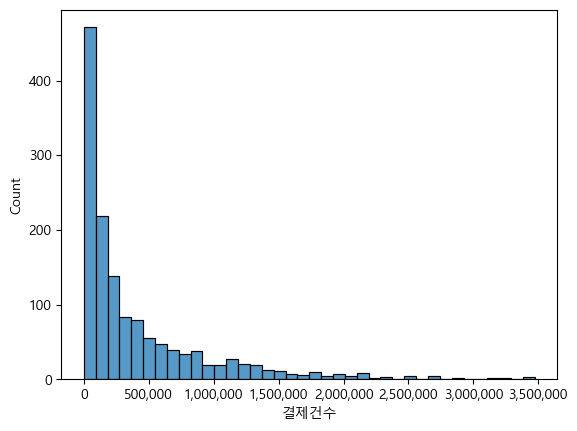

In [32]:
# 히스토그램으로 확인
import matplotlib.ticker as ticker
sns.histplot(data = df1, x='결제건수').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 0~500,000건 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

In [33]:
# 결측치 확인
df1['결제건수'].isna().sum()

0

-> 결제건수에 결측치가 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [결제금액 변수 검토 및 전처리] </h3>

In [34]:
# 변수 타입 파악하기
df1['결제금액'].dtypes

dtype('float64')

결제금액은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [35]:
# 요약 통계량 구하기
df1['결제금액'].describe()

count             1,412.00
mean     10,326,176,929.08
std      15,196,427,220.83
min           2,019,260.00
25%       1,256,623,065.00
50%       4,279,018,518.00
75%      12,951,759,615.50
max     102,000,000,000.00
Name: 결제금액, dtype: float64

-> 현재 금액 데이터의 단위는 '원'인데 출력 결과 숫자가 너무 큰 것을 확인할 수 있음. 따라서 결제금액의 단위를 '만원' 단위로 바꿈.

In [11]:
# 금액 데이터 단위 바꾸기
df1['결제금액'] = df1['결제금액'] / 10000

# 바뀐 데이터 확인
df1['결제금액'].describe()

count    1.454000e+03
mean     1.391483e+06
std      3.282748e+06
min      2.019260e+02
25%      1.277544e+05
50%      4.511224e+05
75%      1.367370e+06
max      4.160000e+07
Name: 결제금액, dtype: float64

-> 결제금액은 실수 타입이며 약 201~10,200,000만 원의 값을 가짐.<br>
약 125~1,294,181만 원에 가장 많이 분포하며, 평균은 약 1,031,423만 원, 중간값은 평균보다 작은 약 427,103만 원으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

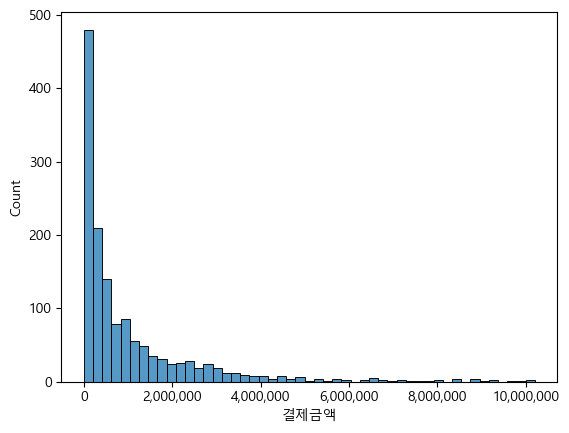

In [37]:
# 히스토그램으로 확인
sns.histplot(data = df1, x = '결제금액').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 0~2,000,000만 원 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

In [38]:
# 결측치 확인
df1['결제금액'].isna().sum()

0

-> 결제금액에 결측치가 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [결제취소건수 변수 검토 및 전처리] </h3>

In [39]:
# 변수 타입 파악하기
df1['결제취소건수'].dtypes

dtype('float64')

In [40]:
# 결측치 확인
df1['결제취소건수'].isna().sum()

114

In [41]:
# 결측치 데이터의 시군명 확인 
df1[df1['결제취소건수'].isna()]['시군명'].drop_duplicates()

1155    김포시
1193    부천시
1261    안산시
1347    여주시
1434    이천시
1468    평택시
1501    하남시
Name: 시군명, dtype: object

-> 결제취소건수(취소금액, 1회 평균 결제금액)은 선택제공항목이므로 김포시, 부천시, 안산시, 여주시, 이천시, 평택시, 하남시는 해당 정보를 제공하지 않은 것을 확인할 수 있음.

In [42]:
# 결측치 제거
df1.dropna(subset=['결제취소건수'], inplace=True)

In [43]:
# 결측치 확인
df1['결제취소건수'].isna().sum()

0

-> 결측치가 모두 제거된 것을 확인할 수 있음.

결제취소건수는 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [44]:
# 요약 통계량 구하기
df1['결제취소건수'].describe()

count    1,298.00
mean     3,000.39
std      4,194.31
min          0.00
25%        349.75
50%      1,420.50
75%      3,880.75
max     30,178.00
Name: 결제취소건수, dtype: float64

-> 결제취소건수는 실수 타입이며 0~30,178건의 값을 가짐.<br>
약 348~3,880건에 가장 많이 분포하며, 평균은 약 2,997건, 중간값은 평균보다 작은 약 1,420건으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

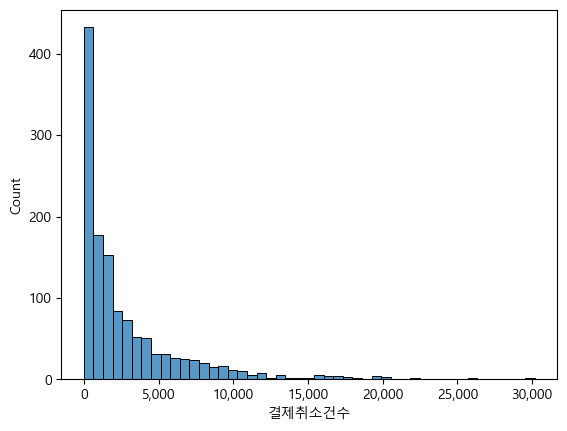

In [45]:
# 히스토그램으로 확인
import matplotlib.ticker as ticker
sns.histplot(data = df1, x='결제취소건수').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) ## 결제취소건수라고 수정 

-> 히스토그램을 보았을 때, 0~500,000건 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

<hr>

<h3> [결제취소금액 변수 검토 및 전처리] </h3>

In [46]:
# 변수 타입 파악하기
df1['결제취소금액'].dtypes

dtype('float64')

In [47]:
# 결측치 확인
df1['결제취소금액'].isna().sum()

0

결제취소금액은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [48]:
# 요약 통계량 구하기
df1['결제취소금액'].describe()

count           1,298.00
mean      141,457,075.23
std       216,102,471.42
min                 0.00
25%        15,102,445.25
50%        61,418,411.50
75%       162,133,441.25
max     1,488,864,774.00
Name: 결제취소금액, dtype: float64

-> 현재 금액 데이터의 단위는 '원'인데 출력 결과 숫자가 너무 큰 것을 확인할 수 있음. 따라서 결제취소금액의 단위를 '만원' 단위로 바꿈.

In [49]:
# 금액 데이터 단위 바꾸기
df1['결제취소금액'] = df1['결제취소금액'] / 10000

# 바뀐 데이터 확인
df1['결제취소금액'].describe()

count     1,298.00
mean     14,145.71
std      21,610.25
min           0.00
25%       1,510.24
50%       6,141.84
75%      16,213.34
max     148,886.48
Name: 결제취소금액, dtype: float64

-> 결제취소금액은 실수 타입이며 약 0~148,886만 원의 값을 가짐.<br>
약 1,501~16,211만 원에 가장 많이 분포하며, 평균은 약 14,129만 원, 중간값은 평균보다 작은 약 6,141만 원으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

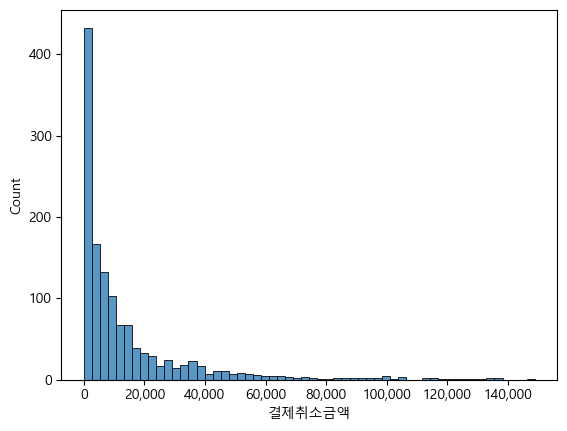

In [50]:
# 히스토그램으로 확인
sns.histplot(data = df1, x = '결제취소금액').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 0~20,000만 원 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

<hr>

<h3> [1회평균결제금액 변수 검토 및 전처리] </h3>

In [51]:
# 변수 타입 파악하기
df1['1회평균결제금액'].dtypes

dtype('float64')

In [52]:
# 결측치 확인
df1['1회평균결제금액'].isna().sum()

0

1회평균결제금액은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [53]:
# 요약 통계량 구하기
df1['1회평균결제금액'].describe()

count    1,298.00
mean    23,672.55
std      5,978.47
min     11,191.00
25%     19,388.25
50%     22,922.50
75%     26,531.75
max     72,340.00
Name: 1회평균결제금액, dtype: float64

-> 1회평균결제금액의 경우 금액이 크지 않아 '원' 단위도 알아보기 편하지만, 앞에서 다른 금액 변수들의 단위를 모두 '만원'으로 변환했기 때문에 1회평균결제금액의 단위를 '만원' 단위로 바꿈.

In [12]:
# 금액 데이터 단위 바꾸기
df1['1회평균결제금액'] = df1['1회평균결제금액'] / 10000

# 바뀐 데이터 확인
df1['1회평균결제금액'].describe()

count    1338.000000
mean        2.391781
std         0.670579
min         1.119100
25%         1.951350
50%         2.298550
75%         2.657675
max         9.674600
Name: 1회평균결제금액, dtype: float64

-> 1회평균결제금액은 실수 타입이며 약 1.12~7.23만 원의 값을 가짐.<br>
약 1.94~2.65만 원에 가장 많이 분포하며, 평균은 약 2.37만 원, 중간값은 평균보다 작은 약 2.29만 원으로 약간 낮은 값 쪽으로 치우쳐 있음.

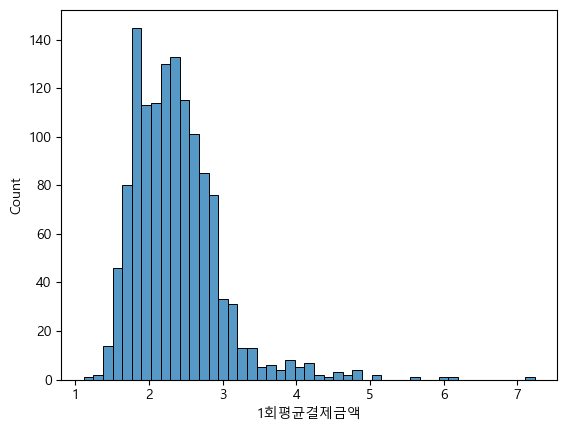

In [55]:
# 히스토그램으로 확인
sns.histplot(data = df1, x = '1회평균결제금액').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 2~3만 원 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

<hr>

<h3> [데이터 전처리 후 데이터 검토] </h3>

In [56]:
# 데이터의 행, 열 개수 출력
print('데이터 전처리 후 데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터 전처리 후 데이터1의 행, 열 개수 : 
(1298, 9)


In [57]:
# 데이터 살펴보기
df1.head(10)

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42
5,2023,가평군,30대,여,99493,"256,340.39","1,230.00","5,420.78",2.58
6,2023,가평군,40대,남,167399,"418,841.34","1,629.00","10,077.03",2.50
7,2023,가평군,40대,여,189169,"478,243.26","1,909.00","7,743.71",2.53
8,2023,가평군,50대,남,190205,"487,926.91","1,796.00","10,924.43",2.57
9,2023,가평군,50대,여,170268,"478,030.85","1,587.00","8,334.57",2.81


In [58]:
# 데이터의 결측치 확인
print(('데이터 전처리 후 데이터1의 결측치 : '))
df1.isnull().sum()

데이터 전처리 후 데이터1의 결측치 : 


기준연도        0
시군명         0
연령대         0
성별          0
결제건수        0
결제금액        0
결제취소건수      0
결제취소금액      0
1회평균결제금액    0
dtype: int64

In [59]:
# 데이터 요약 통계량 확인
df1.describe()

,기준연도,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
count,"1,298.00","1,298.00","1,298.00","1,298.00","1,298.00","1,298.00"
mean,"2,022.15","409,845.07","1,010,297.83","3,000.39","14,145.71",2.37
std,0.77,"552,025.71","1,511,101.08","4,194.31","21,610.25",0.60
min,"2,021.00",283.00,"1,150.68",0.00,0.00,1.12
25%,"2,022.00","51,724.00","122,246.80",349.75,"1,510.24",1.94
50%,"2,022.00","185,704.00","423,850.22","1,420.50","6,141.84",2.29
75%,"2,023.00","545,082.50","1,230,953.89","3,880.75","16,213.34",2.65
max,"2,023.00","3,472,658.00","10,200,000.00","30,178.00","148,886.48",7.23


In [60]:
df1.to_csv('Data1_전쳐리.csv',index=False)

--------
**화성조사-최지운**

In [19]:
df화성=df1[df1['시군명']=='화성시']
df화성.tail()

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
1531,2021,화성시,60대,여,392006,872926.2930,3950.0,140353508.0,2.2268
1532,2021,화성시,70대,남,93924,201672.8621,878.0,36744696.0,2.1472
1533,2021,화성시,70대,여,94936,211313.6980,948.0,31082093.0,2.2259
1534,2021,화성시,80대 이상,남,14820,29606.3119,128.0,3424209.0,1.9977
1535,2021,화성시,80대 이상,여,19625,44199.1314,191.0,6208072.0,2.2522


In [20]:
df화성['결제금액'] = df화성['결제금액'].round()
#df화성['1회평균결제금액'] = df화성['1회평균결제금액'].round()
df화성.tail()

C:\Users\home\AppData\Local\Temp\ipykernel_28624\1681676834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df화성['결제금액'] = df화성['결제금액'].round()


,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
1531,2021,화성시,60대,여,392006,872926.0,3950.0,140353508.0,2.2268
1532,2021,화성시,70대,남,93924,201673.0,878.0,36744696.0,2.1472
1533,2021,화성시,70대,여,94936,211314.0,948.0,31082093.0,2.2259
1534,2021,화성시,80대 이상,남,14820,29606.0,128.0,3424209.0,1.9977
1535,2021,화성시,80대 이상,여,19625,44199.0,191.0,6208072.0,2.2522


<hr>

<h3> [시각화] </h3>

   기준연도  시군명  연령대 성별    결제건수       결제금액   결제취소건수   결제취소금액  1회평균결제금액
0  2023  가평군  10대  남    8409  18,884.51    46.00   487.18      2.25
1  2023  가평군  10대  여    6584  17,660.54    68.00   184.14      2.68
2  2023  가평군  20대  남   70363 154,501.83   728.00 3,756.00      2.20
3  2023  가평군  20대  여   55118 133,250.66   681.00 2,799.63      2.42
4  2023  가평군  30대  남  110968 268,223.50 1,382.00 8,447.63      2.42


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\957158809.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='연령대', y='결제건수', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


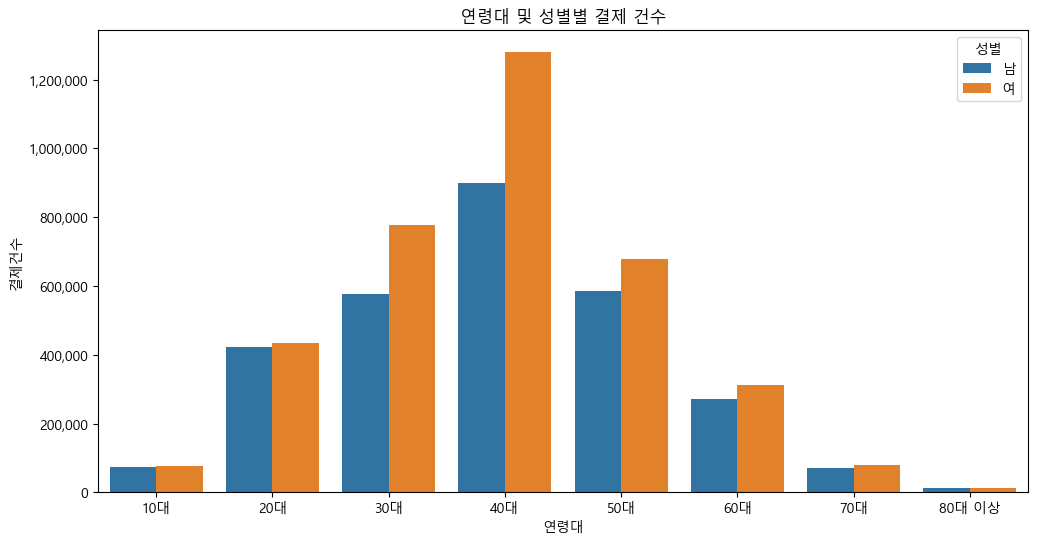

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams.update({'font.family': 'Malgun Gothic'})

# 데이터 확인
print(df1.head())

# 1. 연령대 및 성별별 결제 건수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='연령대', y='결제건수', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('연령대 및 성별별 결제 건수')
plt.show()

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\4000202724.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='연령대', y='결제금액', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


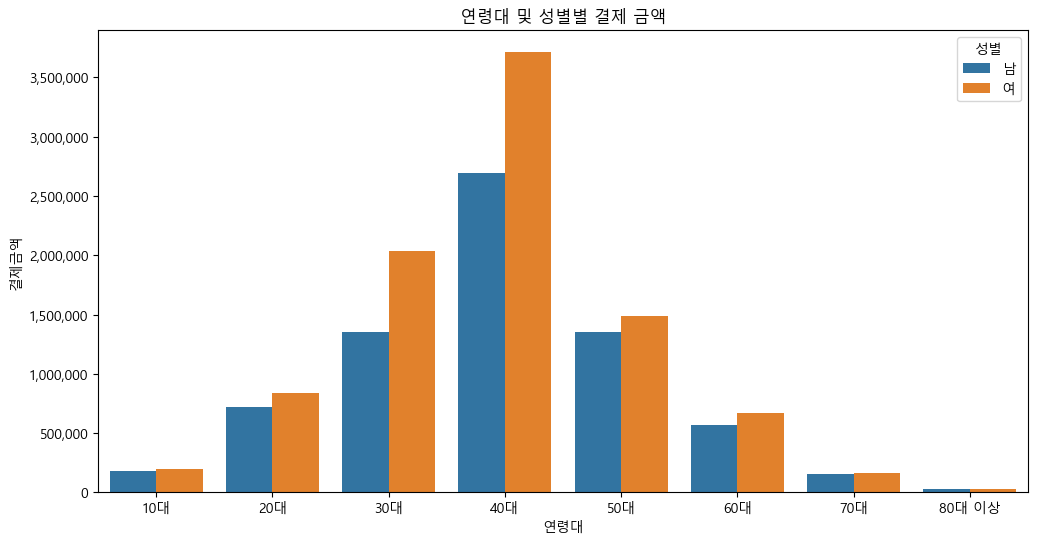

In [62]:
# 2. 연령대 및 성별별 결제 금액 시각화

plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='연령대', y='결제금액', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('연령대 및 성별별 결제 금액')
plt.show()

시군별 성별기준 결제 건수 

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\2190111632.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=a, x='시군명', y='결제건수', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


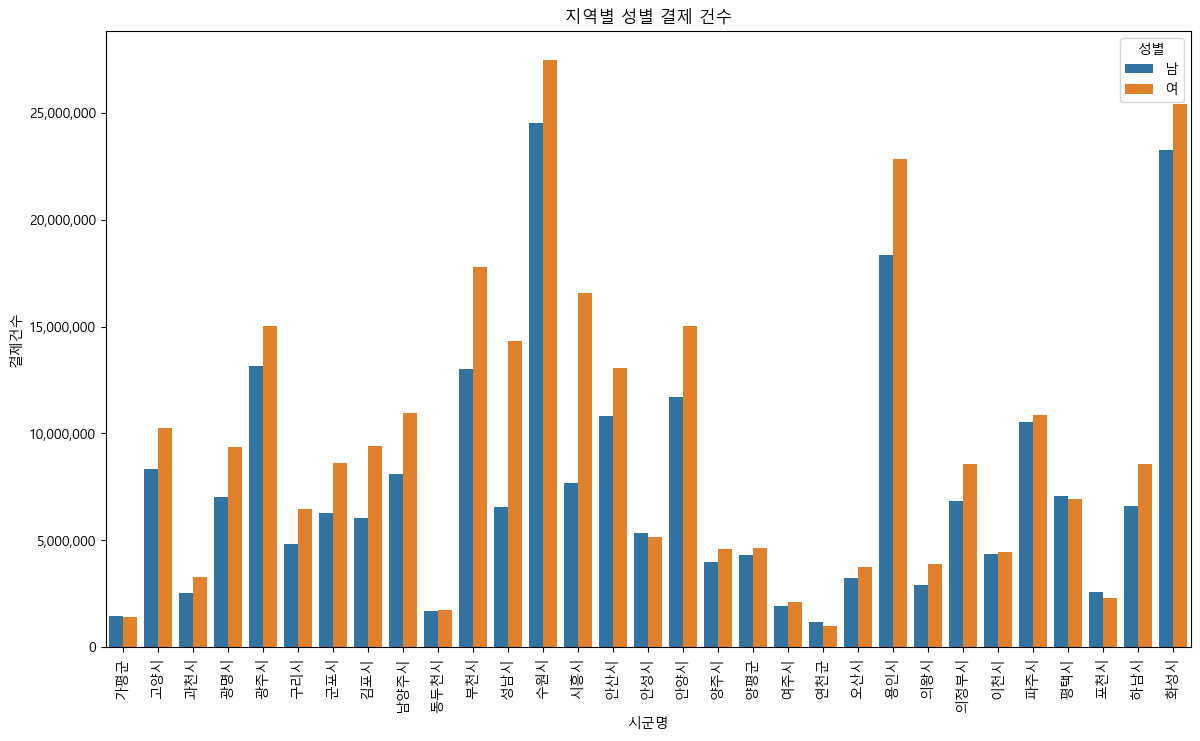

In [63]:
a = df1.groupby(['시군명', '성별'])['결제건수'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=a, x='시군명', y='결제건수', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('지역별 성별 결제 건수')
plt.xticks(rotation=90)
plt.show()

In [1]:
# 연령대별 결제 건수 비율
age_counts = df1.groupby('연령대')['결제건수'].sum()

# 색상 팔레트 설정
colors = sns.color_palette('pastel', len(age_counts))

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    age_counts, 
    labels=age_counts.index, 
    autopct=lambda p: f'{p:.1f}%' if p > 3 else '',  # 작은 비율은 텍스트 표시하지 않음
    startangle=90, 
    colors=colors,
    pctdistance=0.75,  # 비율 텍스트 위치 조정
    labeldistance=1.1,  # 라벨의 위치를 원 밖으로 이동
    wedgeprops={'edgecolor': 'black'}  # 경계선 추가
)

# 텍스트 설정
for text in texts:
    # if text.get_text() == '70대' or '80 이상' or '기타':   ## 나이 기준 글자 겹쳐지는거 어케하나요 ,,,, ???????????
    #    text.set_size(8)  # 작은 크기로 설정
    #    text.set_color('gray')  # 라벨 색상을 회색으로
    # else:
        text.set_size(14)  # 다른 라벨은 큰 크기로 설정
        text.set_color('black')  # 다른 라벨의 색상을 검은색으로
for autotext in autotexts:
    autotext.set_size(12)
    autotext.set_color('black')  # 비율 텍스트의 색상을 흰색으로 변경

plt.title('연령대별 결제 건수 비율', fontsize=16, pad=40)
plt.axis('equal')  # 원을 동그랗게 표현
plt.tight_layout()  # 레이아웃 조정
plt.show()

NameError: name 'df1' is not defined

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\2956267407.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Forty, x='시군명', y='결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


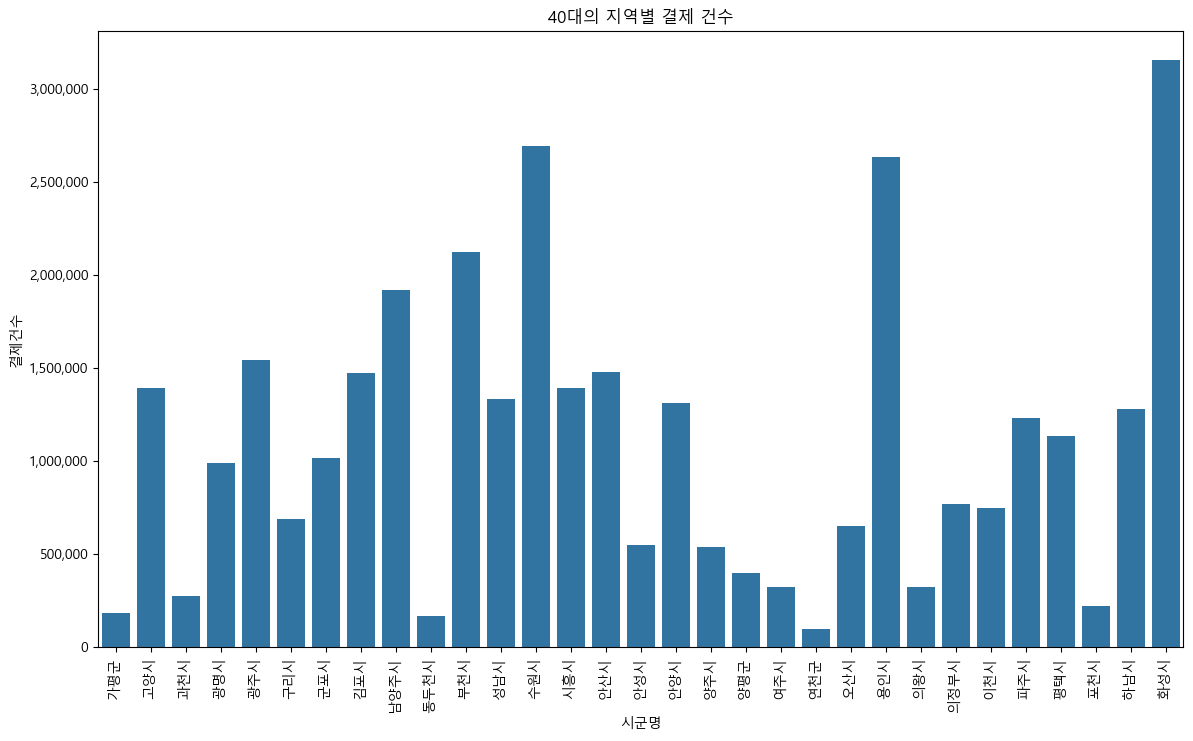

In [65]:
Forty = df1[df1['연령대'] == '40대']

plt.figure(figsize=(14, 8))
sns.barplot(data=Forty, x='시군명', y='결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('40대의 지역별 결제 건수')
plt.xticks(rotation=90)
plt.show()

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\1100372545.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='시군명', y='결제취소건수', ci=None)


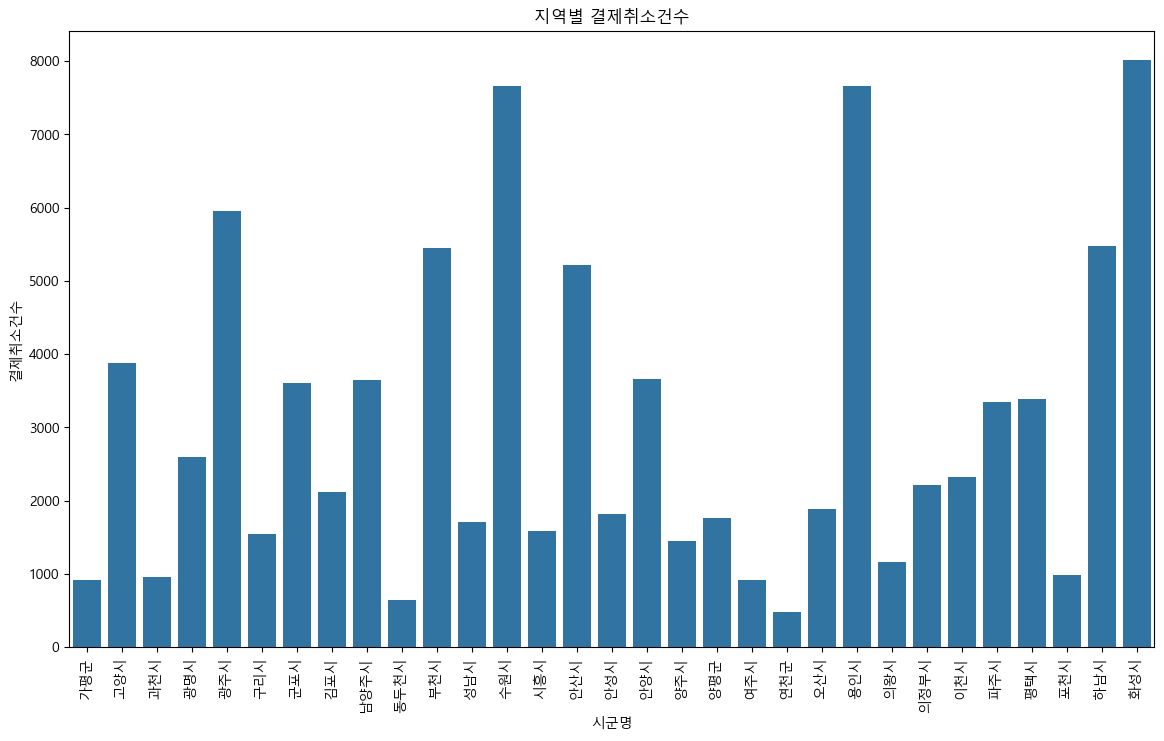

In [68]:
# 지역별 결제취소건수 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df1, x='시군명', y='결제취소건수', ci=None)
plt.title('지역별 결제취소건수')
plt.xticks(rotation=90)
plt.show()

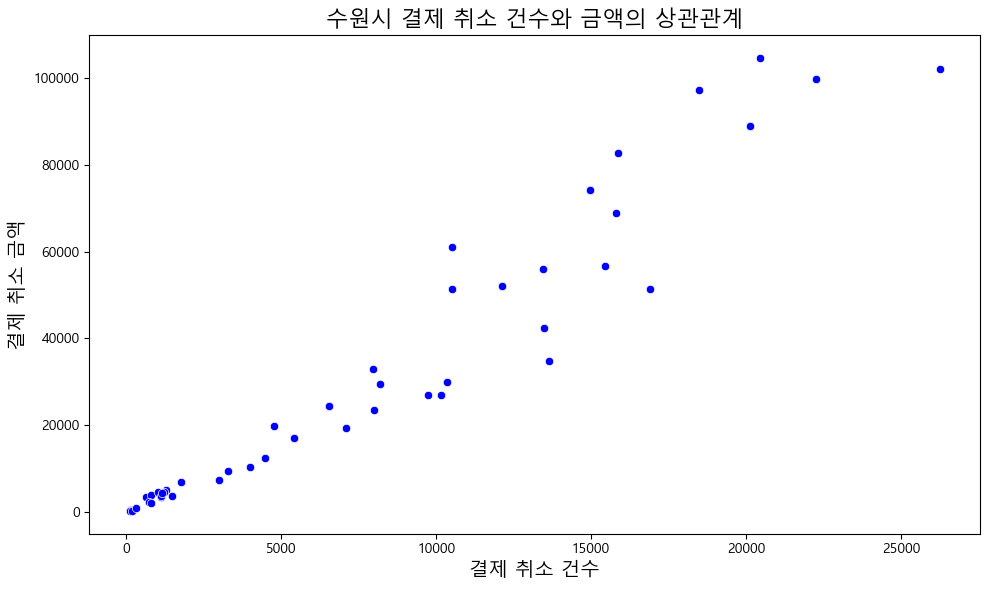

In [69]:
# '수원시' 지역만 필터링
suwon_data = df1[df1['시군명'] == '수원시']

# 산포도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='결제취소건수', y='결제취소금액', data=suwon_data, color='blue')

# 제목 및 레이블 설정
plt.title('수원시 결제 취소 건수와 금액의 상관관계', fontsize=16)
plt.xlabel('결제 취소 건수', fontsize=14)
plt.ylabel('결제 취소 금액', fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

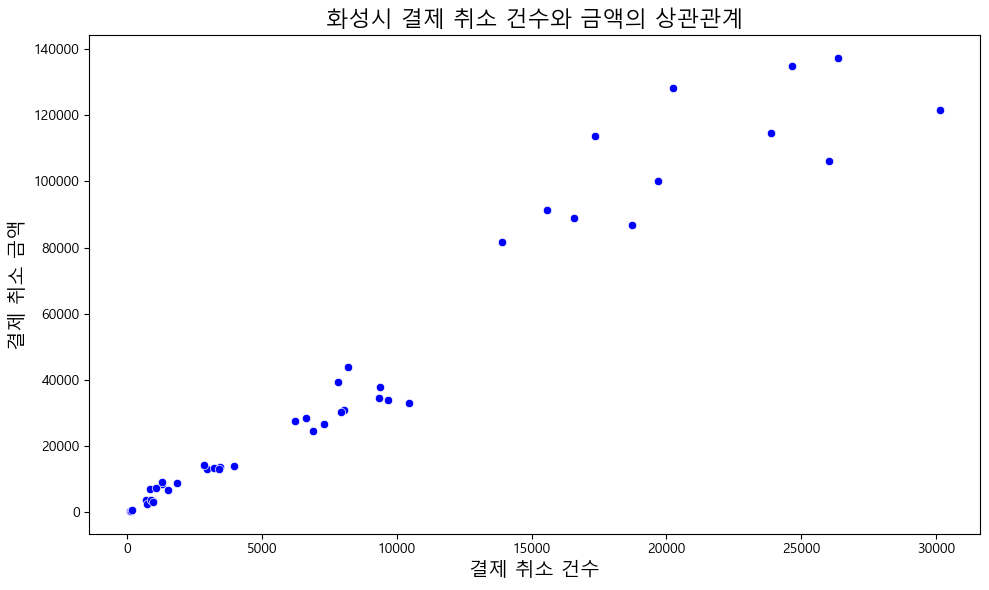

In [70]:
# '수원시' 지역만 필터링
suwon_data = df1[df1['시군명'] == '화성시']

# 산포도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='결제취소건수', y='결제취소금액', data=suwon_data, color='blue')

# 제목 및 레이블 설정
plt.title('화성시 결제 취소 건수와 금액의 상관관계', fontsize=16)
plt.xlabel('결제 취소 건수', fontsize=14)
plt.ylabel('결제 취소 금액', fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

결제취소와 동시에 결제취소 건수가 가장 높은편인 수원시와 화성시의 결제취소건수롸 결제금액의 상관관계를 도출해봄 -> 둘다 양의 상관관계라는 결과 도출

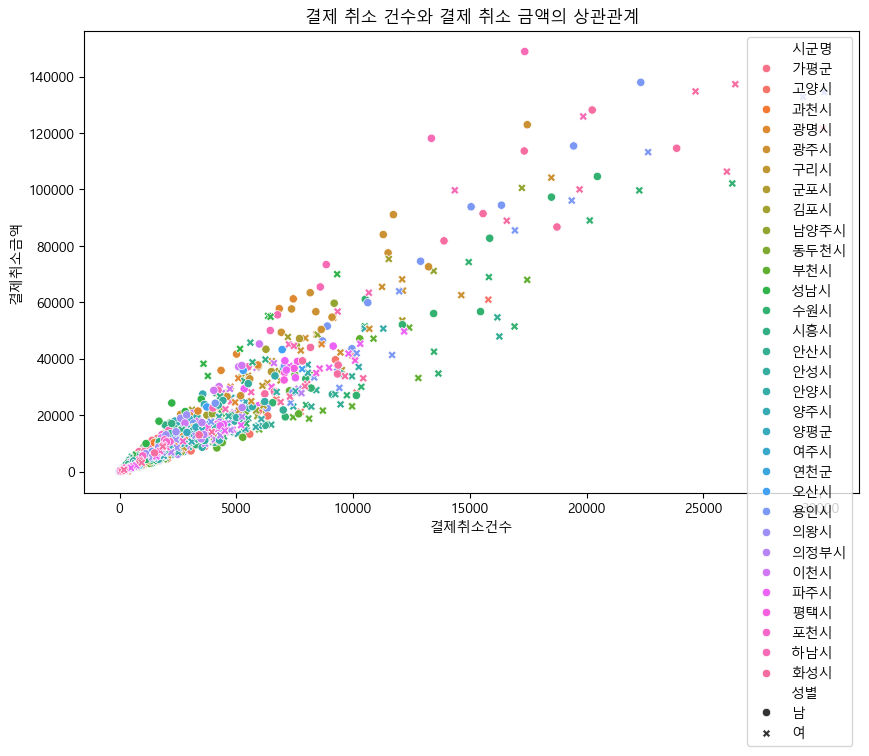

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='결제취소건수', y='결제취소금액', hue='시군명', style='성별')
plt.title('결제 취소 건수와 결제 취소 금액의 상관관계')
plt.show()

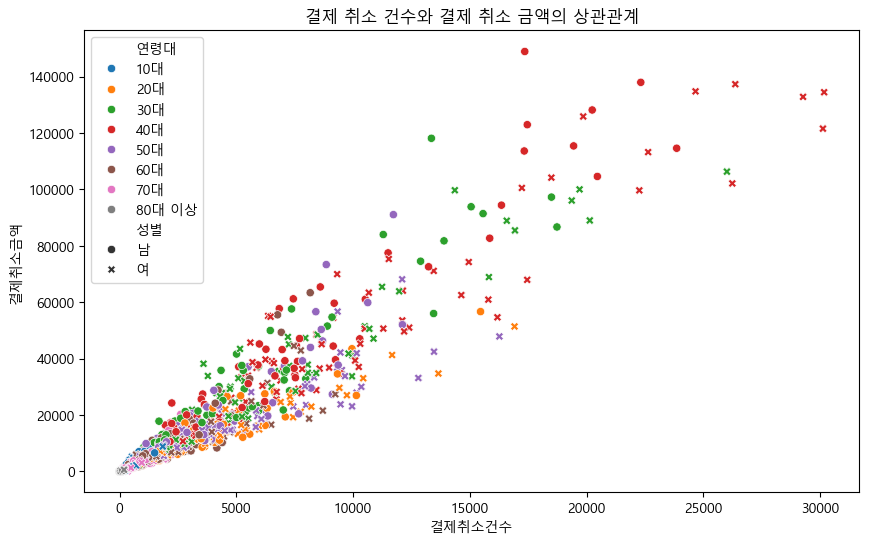

In [72]:
# 4. 결제 취소 건수와 결제 취소 금액의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='결제취소건수', y='결제취소금액', hue='연령대', style='성별')
plt.title('결제 취소 건수와 결제 취소 금액의 상관관계')
plt.show()

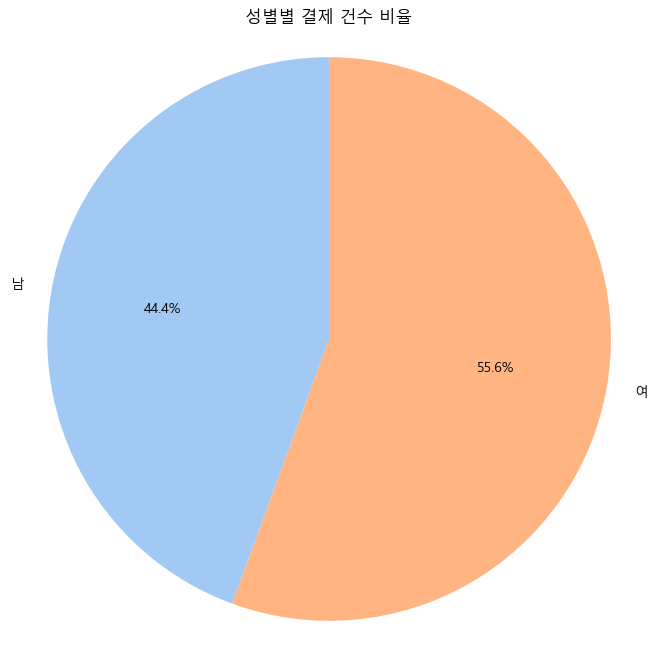

In [73]:
# 2. 성별별 결제 건수 비율
gender_counts = df1.groupby('성별')['결제건수'].sum()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,colors = sns.color_palette('pastel', len(gender_counts))
)
plt.title('성별별 결제 건수 비율')
plt.axis('equal')  # 원을 동그랗게 표현
plt.show()

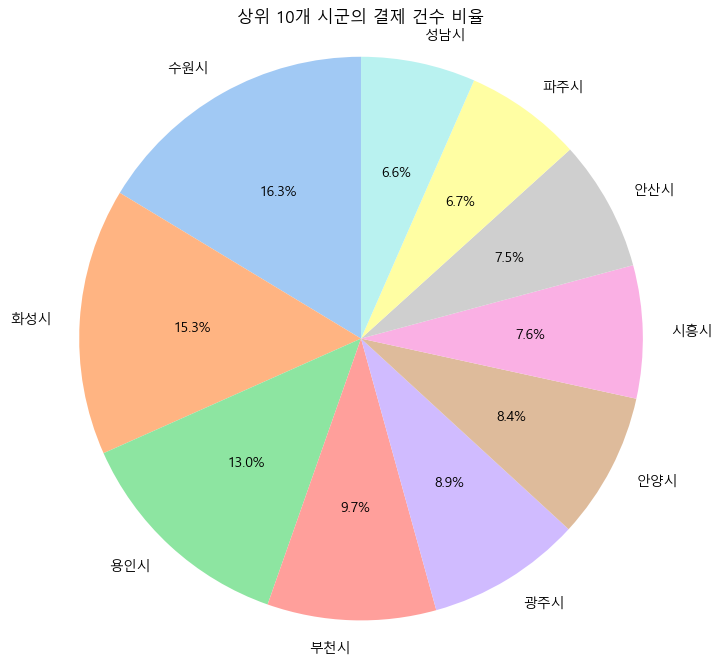

In [74]:
# 3. 시군명별 결제 건수 비율 (상위 10개)
top10_regions = df1.groupby('시군명')['결제건수'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top10_regions, labels=top10_regions.index, autopct='%1.1f%%', startangle=90,colors = sns.color_palette('pastel', len(top10_regions)))
plt.title('상위 10개 시군의 결제 건수 비율')
plt.axis('equal')
plt.show()

<hr>

<h3> [보미 시각화] </h3>

<h4>1. 시군별 총결제건수 추이</h4>

In [24]:
# 시군별 추이를 보기 위해 총결제건수 파생변수를 추가
df1['총결제건수'] = df1.groupby(['기준연도','시군명'])['결제건수'].transform('sum')
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총결제건수
34,2023,과천시,10대,남,22766,51366.9271,88.0,6161480.0,2.2563,1825774
35,2023,과천시,10대,여,17165,47071.8771,99.0,6398930.0,2.7423,1825774
36,2023,과천시,20대,남,91106,143933.9202,443.0,12439880.0,1.5799,1825774
37,2023,과천시,20대,여,93546,166446.3426,586.0,17897761.0,1.7793,1825774
38,2023,과천시,30대,남,147593,280183.3805,864.0,29099616.0,1.8984,1825774
...,...,...,...,...,...,...,...,...,...,...
1531,2021,화성시,60대,여,392006,872926.2930,3950.0,140353508.0,2.2268,17790643
1532,2021,화성시,70대,남,93924,201672.8621,878.0,36744696.0,2.1472,17790643
1533,2021,화성시,70대,여,94936,211313.6980,948.0,31082093.0,2.2259,17790643
1534,2021,화성시,80대 이상,남,14820,29606.3119,128.0,3424209.0,1.9977,17790643


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\349223681.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='시군명', y='총결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


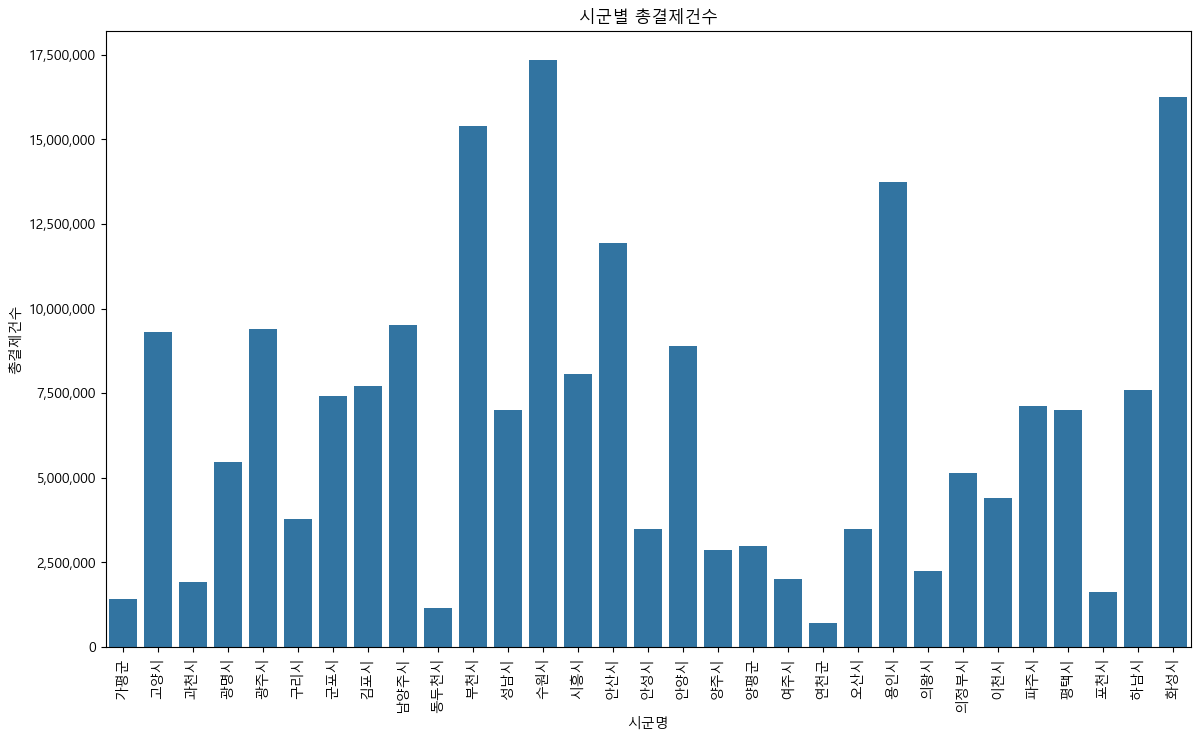

In [76]:
# 지역별 결제건수 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df1, x='시군명', y='총결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('시군별 총결제건수')
plt.xticks(rotation=90)
plt.show()

시군의 개수가 많기 때문에 인터랙티브 그래프로 만듦

In [22]:
import plotly.express as px
fig = px.line(data_frame=df1, x='기준연도', y='총결제건수', color='시군명', markers=True, line_shape='linear', title='시군별 총결제건수 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='총결제건수',
    legend_title='시군명',
    title='시군별 총결제건수 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df1['기준연도'].unique())

-> 2022~2023 데이터만 있긴 하지만 부천, 안산, 고양, 김포의 경우 크게 감소함. 어떤 이유인지 알아보면 좋을 것 같음.

2022년과 2023년 사이의 데이터만 있는 경우 추이를 살펴본다고 하기 부족하므로 2021년~2023년 데이터가 있는 경우만 살펴봄

In [23]:
# 2021년도 데이터가 있는 시군명 필터링
with_2021_data = df1[df1['기준연도'] == 2021]['시군명'].unique()
# 2021년 데이터가 있는 시군만 필터링
filtered_df = df1[df1['시군명'].isin(with_2021_data)]
# 총결제건수 집계
filtered_df['총결제건수'] = filtered_df.groupby(['기준연도', '시군명'])['결제건수'].transform('sum')

fig = px.line(data_frame=filtered_df, x='기준연도', y='총결제건수', color='시군명', markers=True, line_shape='linear', title='시군별 총결제건수 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='총결제건수',
    legend_title='시군명',
    title='시군별 총결제건수 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df1['기준연도'].unique())

-> 총결제건수가 많은 TOP3는 수원, 화성, 용인임.(2021~2023년 데이터가 모두 있는 경우) <br>
수원, 화성, 용인 모두 총결제건수가 감소하고 있지만, 그 중에서도 수원이 가장 크게 감소하고 있음.

<h4>2. 시군별 총결제금액 추이</h4>

In [79]:
# 시군별 추이를 보기 위해 총결제건수 파생변수를 추가
df1['총결제금액'] = df1.groupby(['기준연도','시군명'])['결제금액'].transform('sum')
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총결제건수,총결제금액
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,1453718,"3,774,609.88"
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,1453718,"3,774,609.88"
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,1453718,"3,774,609.88"
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,1453718,"3,774,609.88"
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,1453718,"3,774,609.88"
...,...,...,...,...,...,...,...,...,...,...,...
1531,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,17790643,"41,536,194.92"
1532,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,17790643,"41,536,194.92"
1533,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,17790643,"41,536,194.92"
1534,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,17790643,"41,536,194.92"


시군의 개수가 많기 때문에 인터랙티브 그래프로 만듦

In [80]:
import plotly.express as px
fig = px.line(data_frame=df1, x='기준연도', y='총결제금액', color='시군명', markers=True, line_shape='linear', title='시군별 총결제금액 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='총결제금액',
    legend_title='시군명',
    title='시군별 총결제금액 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df1['기준연도'].unique())

-> 2022~2023 데이터만 있긴 하지만 총결제건수에서 봤듯이 부천, 안산, 고양, 김포의 경우 크게 감소함. 어떤 이유인지 알아보면 좋을 것 같음.

2022년과 2023년 사이의 데이터만 있는 경우 추이를 살펴본다고 하기 부족하므로 2021년~2023년 데이터가 있는 경우만 살펴봄

In [81]:
# 2021년도 데이터가 있는 시군명 필터링
with_2021_data2 = df1[df1['기준연도'] == 2021]['시군명'].unique()
# 2021년 데이터가 있는 시군만 필터링
filtered_df2 = df1[df1['시군명'].isin(with_2021_data2)]
# 총결제건수 집계
filtered_df2['총결제금액'] = filtered_df2.groupby(['기준연도', '시군명'])['결제금액'].transform('sum')

fig = px.line(data_frame=filtered_df2, x='기준연도', y='총결제금액', color='시군명', markers=True, line_shape='linear', title='시군별 총결제금액 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='총결제금액',
    legend_title='시군명',
    title='시군별 총결제금액 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df1['기준연도'].unique())

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\2137697896.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-> 총결제금액이 많은 TOP3는 화성, 수원, 용인임.(2021~2023년 데이터가 모두 있는 경우) <br>
총결제건수의 경우 2021, 2022에 수원이 화성보다 많았지만, 총결제금액은 화성이 수원보다 많음. 즉, 규모는 화성이 제일 크다는 것을 알 수 있음.

<h4>3. 시군별 총1회평균결제금액 추이</h4>

In [82]:
# 시군별 추이를 보기 위해 1회평균결제금액 파생변수를 추가
df1['총1회평균결제금액'] = df1.groupby(['기준연도','시군명'])['1회평균결제금액'].transform('sum')
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총결제건수,총결제금액,총1회평균결제금액
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,1453718,"3,774,609.88",42.11
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,1453718,"3,774,609.88",42.11
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,1453718,"3,774,609.88",42.11
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,1453718,"3,774,609.88",42.11
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,1453718,"3,774,609.88",42.11
...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,17790643,"41,536,194.92",35.45
1532,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,17790643,"41,536,194.92",35.45
1533,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,17790643,"41,536,194.92",35.45
1534,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,17790643,"41,536,194.92",35.45


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\4005856696.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




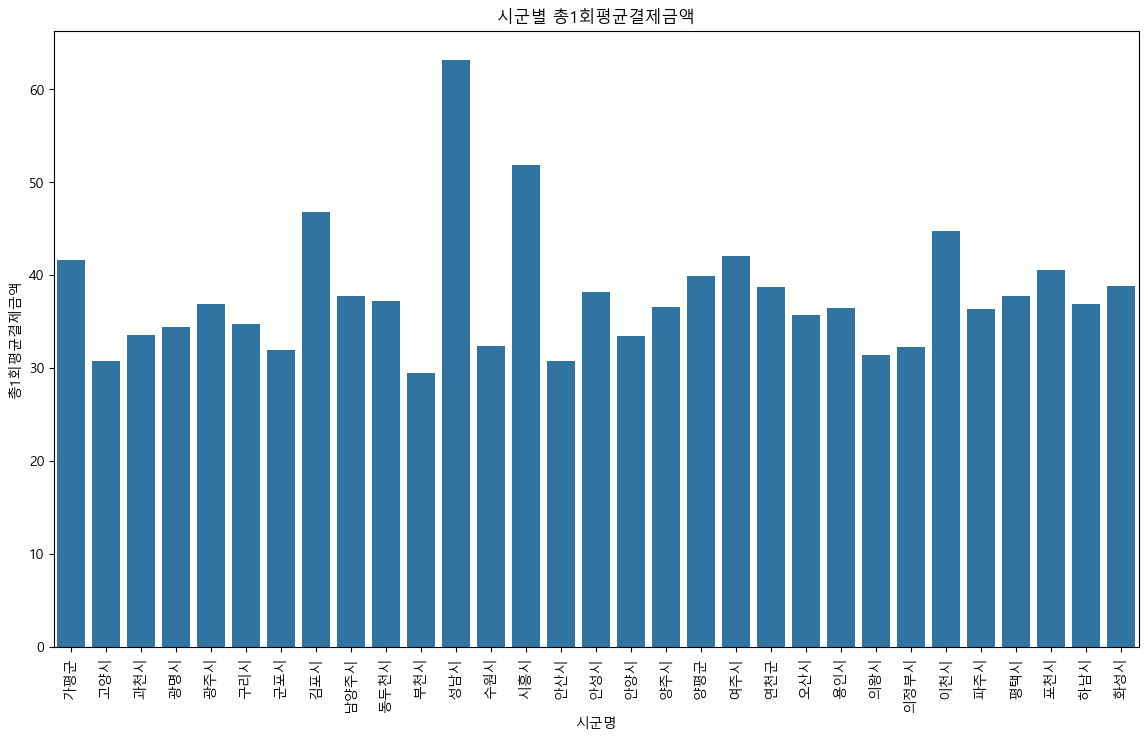

In [95]:
# 3. 지역별 평균 결제 금액 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df1, x='시군명', y='총1회평균결제금액', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('시군별 총1회평균결제금액')
plt.xticks(rotation=90)
plt.show()

In [83]:
import plotly.express as px
fig = px.line(data_frame=df1, x='기준연도', y='총1회평균결제금액', color='시군명', markers=True, line_shape='linear', title='시군별 1회평균결제금액 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='총1회평균결제금액',
    legend_title='시군명',
    title='시군별 총1회평균결제금액 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df1['기준연도'].unique())

2022년과 2023년 사이의 데이터만 있는 경우 추이를 살펴본다고 하기 부족하므로 2021년~2023년 데이터가 있는 경우만 살펴봄

In [84]:
# 2021년도 데이터가 있는 시군명 필터링
with_2021_data3 = df1[df1['기준연도'] == 2021]['시군명'].unique()
# 2021년 데이터가 있는 시군만 필터링
filtered_df3 = df1[df1['시군명'].isin(with_2021_data3)]
# 총결제건수 집계
filtered_df3['총1회평균결제금액'] = filtered_df3.groupby(['기준연도', '시군명'])['1회평균결제금액'].transform('sum')

fig = px.line(data_frame=filtered_df3, x='기준연도', y='총1회평균결제금액', color='시군명', markers=True, line_shape='linear', title='시군별 총1회평균결제금액 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='총1회평균결제금액',
    legend_title='시군명',
    title='시군별 총1회평균결제금액 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df1['기준연도'].unique())

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_1568\2135040238.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-> 총결제건수와 총결제금액의 경우 TOP3가 화성, 수원, 용인이지만 총1회평균결제금액의 경우 해당 3개의 시는 하위에 있으며 성남과 시흥이 상위권에 속함. <br>
하지만, 성남의 경우 2021~2022 사이에는 증가했지만 2022~2023 사이에 크게 감소함. 어떤 이유인지 알아보면 좋을 것 같음. <br>
시흥의 경우 계속 2022~2023사이에 크게 증가하였으므로 어떤 이유인지와 어떻게 하면 결제건수를 더 늘릴지 생각해보면 좋을 것 같음.

<h3> [재희 시각화] </h3>

1. 년도별로 묶은 시군명별 결제취소건수 그래프

In [85]:
# 그룹화된 막대 그래프
fig = px.bar(df1, x='기준연도', y='결제취소건수', color='시군명', barmode='group',
             title='년도별 시군명 결제취소건수')

# 그래프 출력
fig.show()


-> 2021 top3 = 수원시,용인시,화성시 2022- 용인시,수원시,화성시 2023-화성시,용인시,수원시

=> 대체적으로 양극화는 줄어들었지만 순위 변화는 미미하다는 결론

2. 시군별 결제취소금액 추이

In [86]:
# 그룹화된 막대 그래프
fig = px.bar(df1, x='기준연도', y='결제취소금액', color='시군명', barmode='group',
             title='년도별 시군명 결제취소금액')

# 그래프 출력
fig.show()


-> 2021 top3 = 용인시,수원시,화성시 2022- 하남시,광주시,화성시 2023-화성시,용인시,광주시

=> 2022-2023 하남시의 변화추이가 크므로 어떤 변화가 있었는지 알아보면 좋을 듯 그 외의 지역들은 대체적으로 비슷하지만 감소하는 추이를 보임

3. 시군명 별 최다 분포 연령대 확인

In [87]:
# 시군별 총 결제건수 계산
df1['총결제건수'] = df1.groupby('시군명')['결제건수'].transform('sum')

# 연령대별 결제 비율 계산
df1['비율'] = df1['결제건수'] / df1['총결제건수']

# 각 시군명별로 가장 높은 비율을 가진 연령대 추출
max_ratio_df = df1.loc[df1.groupby('시군명')['비율'].idxmax()]

# 원그래프를 위한 데이터 정리
fig = px.pie(max_ratio_df, values='비율', names='시군명', 
             title='시군명별 가장 많이 분포된 연령대',
             hover_data=['연령대'], 
             labels={'비율': '비율'})

# 그래프 출력
fig.show()


In [88]:
# 시군명과 연령대별 총 결제건수 계산
total_by_city_age = df1.groupby(['시군명', '연령대'])['결제건수'].sum().reset_index()

# 시군별 총 결제건수 계산
total_by_city = total_by_city_age.groupby('시군명')['결제건수'].sum().reset_index()
total_by_city.columns = ['시군명', '총결제건수']

# 시군명과 연령대별 비율 계산
total_by_city_age = pd.merge(total_by_city_age, total_by_city, on='시군명')
total_by_city_age['비율'] = total_by_city_age['결제건수'] / total_by_city_age['총결제건수']

# 각 시군명별로 가장 높은 비율을 가진 연령대 추출
max_ratio_df = total_by_city_age.loc[total_by_city_age.groupby('시군명')['비율'].idxmax()]

# 원그래프를 위한 데이터 정리
fig = px.pie(max_ratio_df, values='비율', names='시군명', 
             title='시군명별 가장 많이 분포된 연령대 비율',
             hover_data=['연령대', '결제건수'], 
             labels={'비율': '비율'})

# 그래프 출력
fig.show()

-> 모든 시군명에서 40대의 비율이 가장 높다는 결론 도출

4. 수원,화성,용인의 연령대 분포

In [89]:
def plot_pie_for_city(city_name):
    # 특정 시군명 데이터 필터링
    city_data = df1[df1['시군명'] == city_name]

    if city_data.empty:
        print(f"{city_name}에 대한 데이터가 없습니다.")
        return

    # 연령대별 총 결제건수 계산
    total_by_age = city_data.groupby('연령대')['결제건수'].sum().reset_index()

    # 전체 결제건수 합계 계산
    total_transactions = total_by_age['결제건수'].sum()

    if total_transactions == 0:
        print(f"{city_name}에 대한 결제건수가 없습니다.")
        return

    # 연령대별 비율 계산
    total_by_age['비율'] = total_by_age['결제건수'] / total_transactions

    # 데이터 확인 (디버깅용)
    print(f"{city_name} 데이터:")
    print(total_by_age)

    # 시각화 - 원그래프
    fig_pie = px.pie(total_by_age, values='비율', names='연령대', 
                     title=f'{city_name}의 연령대별 결제건수 비율')

    # 그래프 출력
    fig_pie.show()

# 수원, 화성, 용인 각각에 대한 그래프 생성
cities = ['수원시', '화성시', '용인시']
for city in cities:
    plot_pie_for_city(city)

수원시 데이터:
      연령대      결제건수   비율
0     10대   1155605 0.02
1     20대   9529167 0.18
2     30대  10985652 0.21
3     40대  16145913 0.31
4     50대   9421677 0.18
5     60대   3722571 0.07
6     70대    899530 0.02
7  80대 이상    141068 0.00


화성시 데이터:
      연령대      결제건수   비율
0     10대   1244363 0.03
1     20대   5643041 0.12
2     30대  13002315 0.27
3     40대  18908728 0.39
4     50대   6961604 0.14
5     60대   2323820 0.05
6     70대    543182 0.01
7  80대 이상     88183 0.00


용인시 데이터:
      연령대      결제건수   비율
0     10대   1150003 0.03
1     20대   5818245 0.14
2     30대   8343342 0.20
3     40대  15796289 0.38
4     50대   6844583 0.17
5     60대   2305621 0.06
6     70대    791295 0.02
7  80대 이상    160716 0.00


-> 수원, 화성, 용인 모두 40대와 30대가 높은 비율을 차지하고 있음.

5. 평택, 동두천의 연령대별 분포

In [90]:
# 평택, 동두천 각각에 대한 그래프 생성
cities = ['평택시', '동두천시']
for city in cities:
    plot_pie_for_city(city)

평택시 데이터:
      연령대     결제건수   비율
0     10대   269462 0.02
1     20대  1899509 0.14
2     30대  3327683 0.24
3     40대  4531038 0.32
4     50대  2624876 0.19
5     60대  1088982 0.08
6     70대   254205 0.02
7  80대 이상    40675 0.00


동두천시 데이터:
      연령대     결제건수   비율
0     10대    39728 0.01
1     20대   460435 0.13
2     30대   617427 0.18
3     40대  1012877 0.29
4     50대   793692 0.23
5     60대   393606 0.11
6     70대   110819 0.03
7  80대 이상    23231 0.01


6. 연령대 분포 (결제금액)

In [91]:
def plot_pie_for_city_payment(city_name):
    # 특정 시군명 데이터 필터링
    city_data = df1[df1['시군명'] == city_name]

    if city_data.empty:
        print(f"{city_name}에 대한 데이터가 없습니다.")
        return

    # 연령대별 총 결제금액 계산
    total_by_age = city_data.groupby('연령대')['결제금액'].sum().reset_index()

    # 전체 결제금액 합계 계산
    total_transactions = total_by_age['결제금액'].sum()

    if total_transactions == 0:
        print(f"{city_name}에 대한 결제금액이 없습니다.")
        return

    # 연령대별 비율 계산
    total_by_age['비율'] = total_by_age['결제금액'] / total_transactions

    # 데이터 확인 (디버깅용)
    print(f"{city_name} 데이터:")
    print(total_by_age)

    # 시각화 - 원그래프
    fig_pie = px.pie(total_by_age, values='비율', names='연령대', 
                     title=f'{city_name}의 연령대별 결제금액 비율')

    # 그래프 출력
    fig_pie.show()

# 수원, 화성, 용인 각각에 대한 그래프 생성
cities = ['수원시', '화성시', '용인시','평택시', '동두천시']
for city in cities:
    plot_pie_for_city_payment(city)

수원시 데이터:
      연령대          결제금액   비율
0     10대  2,416,891.06 0.02
1     20대 15,472,729.54 0.14
2     30대 24,697,968.10 0.22
3     40대 42,922,233.00 0.38
4     50대 18,219,984.10 0.16
5     60대  6,741,893.11 0.06
6     70대  1,681,021.64 0.01
7  80대 이상    260,841.70 0.00


화성시 데이터:
      연령대          결제금액   비율
0     10대  3,627,572.30 0.03
1     20대 10,584,335.58 0.08
2     30대 32,457,931.55 0.26
3     40대 55,902,625.40 0.45
4     50대 15,954,550.65 0.13
5     60대  5,108,320.87 0.04
6     70대  1,264,675.95 0.01
7  80대 이상    198,517.48 0.00


용인시 데이터:
      연령대          결제금액   비율
0     10대  2,527,185.79 0.02
1     20대 10,219,236.62 0.10
2     30대 21,257,596.38 0.21
3     40대 45,945,824.43 0.45
4     50대 15,450,552.81 0.15
5     60대  5,037,372.46 0.05
6     70대  1,737,722.88 0.02
7  80대 이상    335,692.54 0.00


평택시 데이터:
      연령대          결제금액   비율
0     10대    628,843.03 0.02
1     20대  3,683,807.75 0.11
2     30대  8,104,580.32 0.24
3     40대 12,770,947.79 0.37
4     50대  5,831,772.39 0.17
5     60대  2,460,802.99 0.07
6     70대    601,985.28 0.02
7  80대 이상    100,243.56 0.00


동두천시 데이터:
      연령대         결제금액   비율
0     10대    82,678.01 0.01
1     20대   914,431.25 0.11
2     30대 1,510,109.03 0.18
3     40대 2,763,668.75 0.33
4     50대 1,865,413.19 0.22
5     60대   937,935.43 0.11
6     70대   255,544.24 0.03
7  80대 이상    49,179.28 0.01


7. 연령대 분포 (1회평균결제금액)

In [101]:
def plot_pie_for_avg_city_payment(city_name):
    # 특정 시군명 데이터 필터링
    city_data = df1[df1['시군명'] == city_name]

    if city_data.empty:
        print(f"{city_name}에 대한 데이터가 없습니다.")
        return

    # 연령대별 총 결제금액 계산
    total_by_age = city_data.groupby('연령대')['1회평균결제금액'].sum().reset_index()

    # 전체 결제금액 합계 계산
    total_transactions = total_by_age['1회평균결제금액'].sum()

    if total_transactions == 0:
        print(f"{city_name}에 대한 1회평균결제금액이 없습니다.")
        return

    # 연령대별 비율 계산
    total_by_age['비율'] = total_by_age['1회평균결제금액'] / total_transactions

    # 데이터 확인 (디버깅용)
    print(f"{city_name} 데이터:")
    print(total_by_age)

    # 시각화 - 원그래프
    fig_pie = px.pie(total_by_age, values='비율', names='연령대', 
                     title=f'{city_name}의 연령대별 1회평균결제금액 비율')

    # 그래프 출력
    fig_pie.show()

# 수원, 화성, 용인 각각에 대한 그래프 생성
cities = ['수원시', '화성시', '용인시','평택시', '동두천시']
for city in cities:
    plot_pie_for_avg_city_payment(city)

수원시 데이터:
      연령대  1회평균결제금액   비율
0     10대     12.88 0.13
1     20대      9.81 0.10
2     30대     13.53 0.14
3     40대     16.21 0.17
4     50대     11.66 0.12
5     60대     10.86 0.11
6     70대     11.20 0.12
7  80대 이상     11.05 0.11


화성시 데이터:
      연령대  1회평균결제금액   비율
0     10대     17.86 0.15
1     20대     11.34 0.10
2     30대     14.99 0.13
3     40대     17.87 0.15
4     50대     13.74 0.12
5     60대     13.23 0.11
6     70대     13.99 0.12
7  80대 이상     13.56 0.12


용인시 데이터:
      연령대  1회평균결제금액   비율
0     10대     13.41 0.12
1     20대     10.58 0.10
2     30대     15.23 0.14
3     40대     17.70 0.16
4     50대     13.55 0.12
5     60대     13.12 0.12
6     70대     13.17 0.12
7  80대 이상     12.58 0.12


평택시 데이터:
      연령대  1회평균결제금액   비율
0     10대      9.38 0.12
1     20대      7.77 0.10
2     30대      9.74 0.13
3     40대     11.27 0.15
4     50대      8.89 0.12
5     60대      9.10 0.12
6     70대      9.51 0.13
7  80대 이상      9.89 0.13


동두천시 데이터:
      연령대  1회평균결제금액   비율
0     10대     13.24 0.12
1     20대     11.99 0.11
2     30대     14.78 0.13
3     40대     16.52 0.15
4     50대     14.21 0.13
5     60대     14.35 0.13
6     70대     14.02 0.13
7  80대 이상     12.64 0.11


8. 연령대별 총 결제금액 추이

In [92]:
# 연령대별 총 결제금액 계산
df_grouped = df1.groupby(['기준연도', '연령대'])['결제금액'].sum().reset_index()

# 시계열 그래프 생성
fig = px.line(df_grouped, x='기준연도', y='결제금액', color='연령대', 
              title='연령대별 총 결제금액 추이',
              labels={'기준연도': '기준연도', '결제금액': '총 결제금액', '연령대': '연령대'})



# 그래프 출력
fig.show()


=> 역시나 40대의 결제 금액이 가장 높음 이로써 40대의 지역화폐 이용율이 가장 높다는 것은 확실시 됨

<hr>

<h3>Data1 전처리 & 시각화 총 정리</h3>

-> 지역화폐 주요 이용 연령대는 40대(남도 높지만 상대적으로 여성이 더 높음)로 1.김포시 2.남양주시 3.오산시순으로 분포되어있음

+ 수원시와 화성시,용인시가 성별 결제건수에서 상위권

-> 시군별 결제건수에서도 수원시,화성시가 1,2위를 차지하며 부천시도 그의 못지않게 상위권을 차지함(부천시의 40대 결제율보다 다른 연령대의 이용률이 높음을 예상)
- 시군별 총 결제건수 추이를 보았을때 여전히 top3는 수원,화성,용인 모두 감소 추세이나 이 셋중 수원이 가장 큰 감소를 보이며 부천, 안산, 고양, 김포에도 큰 감소가 보임 이유 서치하면 좋을 듯
총결제건수의 경우 2021, 2022에 수원이 화성보다 많았지만, 총결제금액은 화성이 수원보다 많음. 즉, 규모는 화성이 제일 크다는 것을 알 수 있음. 여전히 top3는 수원,화성,용인

-> 결제 취소건수는 화성 수원 용인 순으로 결제건수와 유사한 추이를 보임 -> 다른 모든 지역도 결제건수와 취소건수는 양의 상관관계를 가짐
- 시군별 결제취소건수 역시 수원,화성,용인의 순위싸움 => 시간이 흐를수록 대체적으로 양극화는 줄어들었지만 순위 변화는 미미하다는 결론

-> 결제 취소금액 역시 용인,수원,화성 하지만! 2022-2023 하남시의 변화추이가 크므로 어떤 변화가 있었는지 알아보면 좋을 듯 그 외의 지역들은 대체적으로 비슷하지만 감소하는 추이를 보임

-> 총결제건수와 총결제금액의 경우 TOP3가 화성, 수원, 용인이지만 총1회평균결제금액의 경우 해당 3개의 시는 하위에 있으며 성남과 시흥이 상위권에 속함.
하지만, 성남의 경우 2021~2022 사이에는 증가했지만 2022~2023 사이에 크게 감소함. 어떤 이유인지 알아보면 좋을 것 같음. 
시흥의 경우 계속 2022~2023사이에 크게 증가하였으므로 어떤 이유인지와 어떻게 하면 결제건수를 더 늘릴지 생각해보면 좋을 것 같음.

=> 수원,화성,용인의 이용률이 높으니 이 3지역의 연령대 별 결제 분포를 시각화 해봄 
-> 시각화 결과 수원, 화성, 용인 모두 40대가 가장 높고 이후 30대가 2번째로 높음. 그 중에서도 수원은 20, 30, 50대가 비슷한 비율을 보임.

